In [138]:
#import하기
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import PolynomialFeatures
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt
import numpy as np
from sklearn.linear_model import Ridge

In [139]:
#데이터 준비하기 
train_data = pd.read_csv("E:\데이콘\\전복나이 예측\\데이터\\train.csv")
print(train_data.columns)
train_max_input = train_data[['Gender','Lenght','Diameter','Height','Whole Weight','Shucked Weight','Viscra Weight','Shell Weight']]
train_max_target = train_data['Target'].to_numpy()

ques_data = pd.read_csv("E:\데이콘\\전복나이 예측\\데이터\\test.csv")
ques_input = ques_data[['Gender','Lenght','Diameter','Height','Whole Weight','Shucked Weight','Viscra Weight','Shell Weight']]


Index(['id', 'Gender', 'Lenght', 'Diameter', 'Height', 'Whole Weight',
       'Shucked Weight', 'Viscra Weight', 'Shell Weight', 'Target'],
      dtype='object')


In [140]:

# 데이터 결측지 확인 (제공됨)
def check_missing_col(dataframe):
    missing_col = []
    counted_missing_col = 0
    for i, col in enumerate(dataframe.columns):
        missing_values = sum(dataframe[col].isna())
        is_missing = True if missing_values >= 1 else False
        if is_missing:
            counted_missing_col += 1
            print(f'결측치가 있는 컬럼은: {col}입니다')
            print(f'해당 컬럼에 총 {missing_values}개의 결측치가 존재합니다.')
            missing_col.append([col, dataframe[col].dtype])
    if counted_missing_col == 0:
        print('결측치가 존재하지 않습니다')
    return missing_col
missing_col = check_missing_col(train_data)

결측치가 존재하지 않습니다


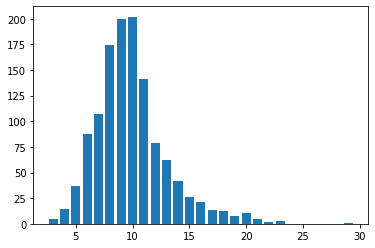

In [141]:
#나이 분포 눈으로 확인
plt.bar(np.unique(train_max_target, return_counts= True)[0],np.unique(train_max_target, return_counts= True)[1])
plt.show()


In [142]:
#성별 원핫 인코딩
train_max_input = pd.concat([train_max_input.drop(['Gender'],axis=1),pd.get_dummies(train_max_input['Gender'])],axis=1)
ques_input =pd.concat([ques_input.drop(['Gender'],axis=1),pd.get_dummies(ques_input['Gender'])],axis=1)
print(train_max_input)

      Lenght  Diameter  Height  Whole Weight  Shucked Weight  Viscra Weight  \
0      0.605     0.470   0.115        1.1140          0.3925         0.2910   
1      0.430     0.315   0.095        0.3780          0.1750         0.0800   
2      0.580     0.490   0.195        1.3165          0.5305         0.2540   
3      0.535     0.405   0.175        1.2705          0.5480         0.3265   
4      0.310     0.235   0.090        0.1270          0.0480         0.0310   
...      ...       ...     ...           ...             ...            ...   
1248   0.190     0.145   0.040        0.0380          0.0165         0.0065   
1249   0.395     0.310   0.085        0.3170          0.1530         0.0505   
1250   0.525     0.410   0.115        0.7745          0.4160         0.1630   
1251   0.445     0.335   0.110        0.4355          0.2025         0.1095   
1252   0.750     0.550   0.195        1.8325          0.8300         0.3660   

      Shell Weight  F  I  M  
0           0.3100  0

In [143]:
#훈련세트와 테스트 세트 나누기
train_input, test_input, train_target, test_target = train_test_split(train_max_input,train_max_target, test_size=0.2, random_state=42)

In [144]:
#훈련세트랑 검증세트도
sub_input, val_input,sub_target, val_target = train_test_split(train_input,train_target, test_size=0.2,random_state=42)

In [145]:
#다루기 쉽게 데이터프레임 ㅡ> 넘파이 배열
train_input = train_input.to_numpy()
test_input = test_input.to_numpy()
sub_input = sub_input.to_numpy()
val_input = val_input.to_numpy()

In [146]:
#특성공학으로 특성 늘리기
poly = PolynomialFeatures(degree=3,include_bias= False)
poly.fit(sub_input)
train_poly=poly.transform(train_input)
test_poly = poly.transform(test_input)
sub_poly=poly.transform(sub_input)
val_poly = poly.transform(val_input)

In [147]:
#급하게 데이터 준비
ques_input = ques_input.to_numpy()
train_max_poly = poly.transform(train_max_input)
ques_poly = poly.transform(ques_input)

C:\Users\dlehd\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py:443: UserWarning: X has feature names, but PolynomialFeatures was fitted without feature names
  warnings.warn(


In [148]:
#다중회귀 로 예측
lr = LinearRegression()
lr.fit(sub_poly, sub_target)
print(lr.score(sub_poly,sub_target))
print(lr.score(val_poly,val_target))

0.7298523791512452
-32.32491323545421


In [149]:
print(train_max_input.shape, '=')
print(train_input.shape,'+')
print(test_input.shape,'=')
print(sub_input.shape,'많음')
print(val_input.shape)

(1253, 10) =
(1002, 10) +
(251, 10) =
(801, 10) 많음
(201, 10)


In [150]:
#규제 전 전처리 과정
from sklearn.preprocessing import StandardScaler
ss= StandardScaler()
ss.fit(sub_poly)
train_scaled = ss.transform(train_poly)
sub_scaled = ss.transform(sub_poly)
val_scaled = ss.transform(val_poly)
train_max_scaled = ss.transform(train_max_poly)
ques_scaled = ss.transform(ques_poly)
test_scaled = ss.transform(test_poly)

In [151]:
print(train_max_scaled.shape, '=')
print(train_scaled.shape,'+')
print(test_scaled.shape,'=')
print(sub_scaled.shape)
print(val_scaled.shape)

(1253, 285) =
(1002, 285) +
(251, 285) =
(801, 285)
(201, 285)


In [152]:
#릿지 규제
ridge = Ridge()
ridge.fit(sub_scaled, sub_target)
print(ridge.score(sub_scaled,sub_target))
print(ridge.score(val_scaled,val_target))

0.5925302082548048
0.5576643369765695


In [153]:
sub_scores =[]
val_scores = []

In [154]:
#최적의 alpha값 찾기
alpha_list = [0.001,0.01,0.1,1,10,100,1000,10000]
for alpha in alpha_list:
    ridge= Ridge(alpha=alpha)
    ridge.fit(sub_scaled, sub_target)
    sub_scores.append(ridge.score(sub_scaled,sub_target))
    val_scores.append(ridge.score(val_scaled,val_target))
    
print(sub_scores)
print(val_scores)

[0.6791542946178863, 0.647587731496198, 0.6202176873893614, 0.5925302082548048, 0.5580203033646813, 0.5144957982023082, 0.4444120871085787, 0.34157830820531143]
[0.0063593345089298925, 0.32822843083886233, 0.4729451991306254, 0.5576643369765695, 0.5587601012533272, 0.5009679739752027, 0.43621002039093715, 0.3287291054442568]


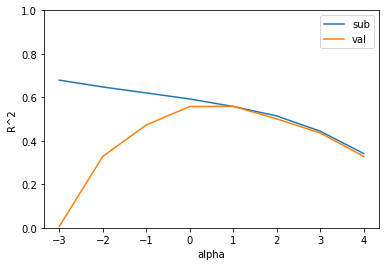

In [155]:
plt.plot(np.log10(alpha_list),sub_scores)
plt.plot(np.log10(alpha_list),val_scores)
plt.ylim(0, 1)
plt.xlabel('alpha')
plt.ylabel('R^2')
plt.legend(['sub','val'])
plt.show()

In [156]:
#최종 확인
ridge =Ridge(alpha=10)
ridge.fit(train_scaled,train_target)
print(ridge.score(train_scaled,train_target))
print(ridge.score(test_scaled,test_target))

0.5654357182819001
0.5551667665446338


In [157]:
#답 구하기
ridge.fit(train_max_scaled,train_max_target)
ans=ridge.predict(ques_scaled)

In [158]:
submission = pd.read_csv("E:\데이콘\전복나이 예측\데이터\sample_submission.csv")
submission['Target'] = ans
submission.to_csv("Submit_3.csv",index=False)

In [159]:
##파일에 저장
#f= open("ridge_submission.csv","w")
#id = range(1,2925)
#for i in id:
#    f.write(str(i) + ',' + str(ans[i-1]) + '\n')
#f.close()

In [160]:
#예상 평가 점수 만들어보기
def NMAE(true, pred):
    mae = np.mean(np.abs(true-pred))
    score = mae / np.mean(np.abs(true))
    return score
ridge = Ridge(alpha=10)
ridge.fit(train_scaled,train_target)
pred = ridge.predict(test_scaled)
print(pred[:10])
print(test_target[:10])

print(NMAE(test_target,np.around(pred)))

[11.33215288 11.69386422  9.75229942  9.07976597 15.34589717 10.81738575
  9.0744705  10.02646936  7.89435646 13.38853248]
[ 8 13 13  9 13 14 10  9  6 13]
0.14472075010191604
